<a href="https://colab.research.google.com/github/jameslee1994/Final-Project/blob/main/MPAA_Ratings_and_Profitability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MPAA Ratings and Profitability - Exploratory Data Analysis

## Introduction

I have noticed over the years that many of the biggest blockbusters have been movies we could all enjoy going to see together as a family. Yet recently, it seems that there are fewer movies I feel I can comfortably take my younger children to.

This made me curious to explore what the drivers or motivations are for creating rated "R" movies vs lower rated movies.

This exploratory data analysis (EDA) investigates how movie content ratings (G, PG, PG-13, R) relate to earnings and profits.

The core questions are simple and practical:
* Which ratings are produced most often?
* Which MPAA ratings tend to earn more revenue?
* Which cost more to make?
* Which deliver higher profitability?
* Do “family-friendly” films (G/PG, or even PG-13) outperform R-rated films?
* How are these trends changing over time?

### Dataset Selection

The hardest thing to find was a good movies dataset that also included MPAA rating data. I ultimately combined two widely used movie datasets found on Kaggle.com:
* [Top Movies Ultimate Dataset](https://www.kaggle.com/datasets/michaelmatta0/movies-ultimate-metrics-features-and-metadata?select=Top+Movies+%28Raw+Data%29.csv )
* [Movies Dataset](https://www.kaggle.com/datasets/ashishkumarjayswal/movies-updated-data)

Both included title, year, MPAA rating, genre, production budget and worldwide gross.

In [11]:
# Import all the usual libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
# Read in csv file to Pandas datafile
# Use the raw data URL from GitHub
df = pd.read_csv('https://raw.githubusercontent.com/jameslee1994/Final-Project/main/datasets/movies_slim.csv')

### Inspecting the Data

The first dataset contained a set of 5744 movies, with little missing data, however I wanted to make sure that it represented trends over the past 40 years, so I wanted to check and be sure the range of years it covered.

In [13]:
# EXAMINE DATA
# Look at size of dataset and columns
df.info()

# Look at data to see sample values
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5744 entries, 0 to 5743
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         5744 non-null   object 
 1   budget        5744 non-null   int64  
 2   gross         5744 non-null   int64  
 3   mpaa          5744 non-null   object 
 4   running_time  5744 non-null   float64
 5   genre         5679 non-null   object 
 6   year          5744 non-null   int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 314.3+ KB


,title,budget,gross,mpaa,running_time,genre,year
0,Star Wars Ep. VII: The Force Awakens,533200000,2056046835,PG-13,136.0,Adventure,2015
1,Avatar: The Way of Water,460000000,2315589775,PG-13,190.0,Action,2022
2,Indiana Jones and the Dial of Destiny,402300000,383963057,PG-13,142.0,Adventure,2023
3,Avengers: Endgame,400000000,2748242781,PG-13,181.0,Action,2019
4,Pirates of the Caribbean: On Stranger Tides,379000000,1045713802,PG-13,136.0,Adventure,2011


In [14]:
# Check null values
df.isna().sum()

# TODO: There are 65 rows with null values in genre. Decide what to do with these

,0
title,0
budget,0
gross,0
mpaa,0
running_time,0
genre,65
year,0


In [15]:
# DUPLICATES:
# Check for duplicate year and title combinations
df.duplicated(subset=['year', 'title'], keep=False).sum()

np.int64(0)

<Axes: >

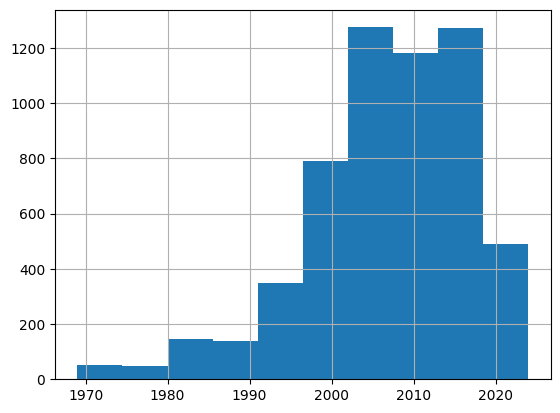

In [16]:
# YEAR:
# See which years this dataset covers
df['year'].hist()

### Supplementing my Dataset

To supplement my data, I found another dataset of similar size and quality, but that appeared to have more movies from the 80s and 90s to round out my dataset.

In [17]:
# READ IN 2ND DATASET
# Read in movies_3_slim csv file as df2 to Pandas datafile
df2 = pd.read_csv('https://raw.githubusercontent.com/jameslee1994/Final-Project/main/datasets/movies_slim_2.csv')

### Inspecting my Supplemental Dataset

My 2nd dataset looked great, but had over 1200 values equal to zero in the budget column. My datasets overlapped a little bit, so I was hoping that in merging the two, I could fill in some of the missing data.

In [18]:
# Inspect size and columns in dataset and check for null values
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3804 entries, 0 to 3803
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   title         3804 non-null   object 
 1   budget        3804 non-null   int64  
 2   gross         3804 non-null   float64
 3   mpaa          3804 non-null   object 
 4   running_time  3804 non-null   object 
 5   genre         3804 non-null   object 
 6   year          3804 non-null   int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 208.2+ KB


In [19]:
# Look at data to see sample values
df2.head(5)

# Looks like running_time has some wierd values with trailing commas. Fix values and convert column to int.
df2['running_time'] = df2['running_time'].str.replace(',', '').astype(float).astype(int)

In [20]:
# Look for any rows with values equal to 0
(df2 == 0).sum()

# TODO: Looks like budget has 1255 empty rows. Will leave for now.

,0
title,0
budget,1255
gross,0
mpaa,0
running_time,0
genre,0
year,0


<Axes: >

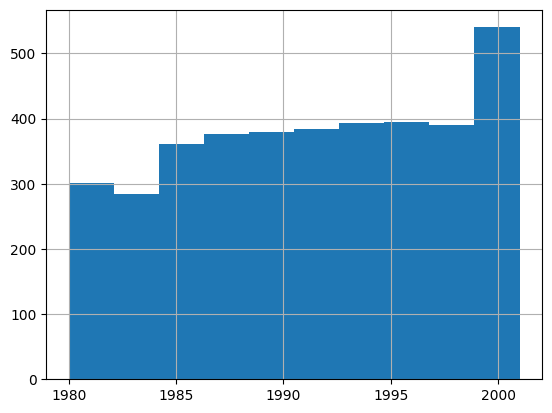

In [21]:
# Look at range of years this data covers
df2['year'].hist()

# This dataset fills in a lot more of the older movies. This will help when looking at trends over time.

In [22]:
# I think data is ready to merge. Let's go!

### Merging the dataframes
I performed a full outer merge of `df` and `df2` based on 'title' and 'year'. This included all rows from both dataframes, creating a combined dataframe.

In [23]:
#Perform a full outer merge of df and df2 based on 'title' and 'year' and store the result in merged_df, then display the head of the merged dataframe.
merged_df = pd.merge(df, df2, on=['title', 'year'], how='outer')
display(merged_df.head())

,title,budget_x,gross_x,mpaa_x,running_time_x,genre_x,year,budget_y,gross_y,mpaa_y,running_time_y,genre_y
0,'Round Midnight,NaN,NaN,NaN,NaN,NaN,1986,0.0,3272593.0,R,133.0,Drama
1,"'night, Mother",NaN,NaN,NaN,NaN,NaN,1986,0.0,441863.0,PG-13,96.0,Drama
2,(500) Days of Summer,7500000.0,34515303.0,PG-13,95.0,Romantic Comedy,2009,NaN,NaN,NaN,NaN,NaN
3,*batteries not included,NaN,NaN,NaN,NaN,NaN,1987,25000000.0,65088797.0,PG,106.0,Comedy
4,10 Cloverfield Lane,15000000.0,108286422.0,PG-13,103.0,Thriller/Suspense,2016,NaN,NaN,NaN,NaN,NaN


### Cleaning my merged dataframe

To clean my merged dataframe, I looked at each column and checked for null values and zero values. I checked data types, standardized field values, tried to populate missing values, and dropped data that I didn't need.

Additionally I created several new columns to make it easier to analyze my data.

In [24]:
#Display the head and info of the final merged dataframe to verify the changes.
merged_df.info()
merged_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8467 entries, 0 to 8466
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           8467 non-null   object 
 1   budget_x        5744 non-null   float64
 2   gross_x         5744 non-null   float64
 3   mpaa_x          5744 non-null   object 
 4   running_time_x  5744 non-null   float64
 5   genre_x         5679 non-null   object 
 6   year            8467 non-null   int64  
 7   budget_y        3804 non-null   float64
 8   gross_y         3804 non-null   float64
 9   mpaa_y          3804 non-null   object 
 10  running_time_y  3804 non-null   float64
 11  genre_y         3804 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 793.9+ KB


,title,budget_x,gross_x,mpaa_x,running_time_x,genre_x,year,budget_y,gross_y,mpaa_y,running_time_y,genre_y
0,'Round Midnight,NaN,NaN,NaN,NaN,NaN,1986,0.0,3272593.0,R,133.0,Drama
1,"'night, Mother",NaN,NaN,NaN,NaN,NaN,1986,0.0,441863.0,PG-13,96.0,Drama
2,(500) Days of Summer,7500000.0,34515303.0,PG-13,95.0,Romantic Comedy,2009,NaN,NaN,NaN,NaN,NaN
3,*batteries not included,NaN,NaN,NaN,NaN,NaN,1987,25000000.0,65088797.0,PG,106.0,Comedy
4,10 Cloverfield Lane,15000000.0,108286422.0,PG-13,103.0,Thriller/Suspense,2016,NaN,NaN,NaN,NaN,NaN


####  Handle zero values in 'budget' column

Handle zero values in the 'budget' column of the merged dataframe, filling in zero values from either dataset where available. Create new 'budget' column in merged_df, filling in zero values from the corresponding '_y' columns if the '_x' column has a zero.


In [25]:
# Create the new 'budget' column, prioritizing non-null values from _x, then _y
merged_df['budget'] = merged_df['budget_x'].fillna(merged_df['budget_y'])

####  Consolidate values in 'gross' column

Handle zero values in the 'gross' column of the merged dataframe, filling in zero values from either dataset where available. Create new 'gross' column in merged_df, filling in zero values from the corresponding '_y' columns if the '_x' column has a zero.

In [26]:
# Create the new 'gross' column, prioritizing non-null values from _x, then _y
merged_df['gross'] = merged_df['gross_x'].fillna(merged_df['gross_y'])

In [27]:
#Re-check for values == 0 in the 'budget' column
(merged_df['budget'] == 0).sum()

#Well, got rid of 20 or so anyway :|
# Drop remaining rows where budget == 0
merged_df = merged_df[merged_df['budget'] > 0]

#### Handle missing values in 'genre'

For rows where the 'genre' from `df` is missing or null, try to fill it with the 'genre' value from `df2` if it exists and is not null.


In [28]:
# Fill null values in 'genre_x' with values from 'genre_y'
merged_df['genre_x'] = merged_df['genre_x'].fillna(merged_df['genre_y'])

# Create the new 'genre' column
merged_df['genre'] = merged_df['genre_x']

# Display the relevant columns to verify
display(merged_df[['genre_x', 'genre_y', 'genre']].head())

#Well, got rid of 4. That wasn't worth the effort!
# Drop remaining rows with no genre
merged_df = merged_df.dropna(subset=['genre'])

#Re-check for null values in the 'genre' column
(merged_df['genre'].isna()).sum()

,genre_x,genre_y,genre
2,Romantic Comedy,NaN,Romantic Comedy
3,Comedy,Comedy,Comedy
4,Thriller/Suspense,NaN,Thriller/Suspense
5,Drama,NaN,Drama
6,Romantic Comedy,Comedy,Romantic Comedy


np.int64(0)

#### Prioritize 'mpaa' from df

Create a new 'mpaa' column. Where 'mpaa' from `df` exists and is not null, use that value. Otherwise, use the 'mpaa' value from `df2` if it exists and is not null.


In [29]:
# Consolidate mpaa values, giving priority to df values
merged_df['mpaa'] = np.where(merged_df['mpaa_x'].notna(), merged_df['mpaa_x'], merged_df['mpaa_y'])

#Re-check values in the 'mpaa' column
merged_df['mpaa'].value_counts()

#Will clean up column values later

,count
mpaa,
R,3334
PG-13,2162
PG,1196
NR,298
G,154
Not Rated,12
Unrated,10
NC-17,5
X,1


#### Clean up merged columns

Address duplicate columns created by the merge (e.g., 'budget_x', 'budget_y') by consolidating them into single columns, using the filled-in values.


In [30]:
# Identify columns with _x and _y suffixes
cols_to_drop = [col for col in merged_df.columns if col.endswith('_x') or col.endswith('_y')]

# Drop the identified columns
merged_df = merged_df.drop(columns=cols_to_drop)

#### Inspect 'year' Column

<Axes: >

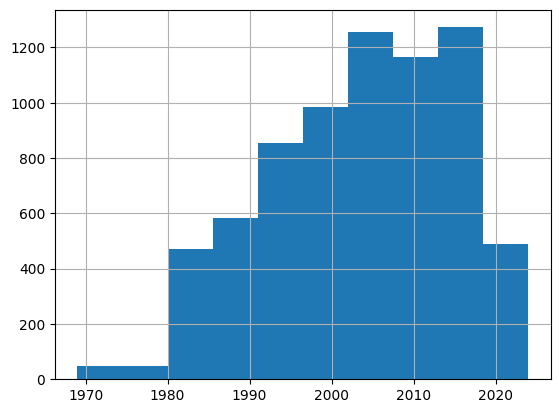

In [31]:
# Check year distribution of movies in
merged_df['year'].hist()

# Yay! Looks like we filled up the 80s and 90s much better

#### Inspect 'mpaa' Column

In [32]:
# RATING:
# See which ratings are included
merged_df['mpaa'].value_counts()

,count
mpaa,
R,3334
PG-13,2162
PG,1196
NR,298
G,154
Not Rated,12
Unrated,10
NC-17,5
X,1


In [33]:
# Replace all 'Not Rated' values with "NR"
merged_df['mpaa'] = merged_df['mpaa'].replace('Not Rated', 'NR')

In [34]:
# Remove all other rows with non-standard ratings
merged_df = merged_df[merged_df['mpaa'].isin(['G','PG','PG-13','R',])]

#### Create 'mpaa_num' column containing numeric version of ratings

In [35]:
# Create new column 'mpaa_num' containing numeric version of ratings to use for correlation
merged_df['mpaa_num'] = merged_df['mpaa'].map({
    'G': 0,
    'PG': 1,
    'PG-13': 2,
    'R': 3,
})

#### Inspect 'gross' Column

In [36]:
# GROSS:
# Look for outliers
display(merged_df['gross'].describe())

# Everything looks legit. Going to leave outliers for now.

,gross
count,6.846000e+03
mean,9.536408e+07
std,1.851431e+08
min,4.300000e+01
25%,7.582410e+06
50%,2.988932e+07
75%,9.821006e+07
max,2.923706e+09


In [37]:
# For simplicity, going to convert gross to int
merged_df['gross'] = merged_df['gross'].astype(int)

#### Inspect 'budget' Column

In [38]:
# BUDGET:
# Look for outliers
merged_df['budget'].describe()

# Looks legit. Going to leave outliers for now

,budget
count,6.846000e+03
mean,3.384339e+07
std,4.342194e+07
min,1.100000e+03
25%,8.000000e+06
50%,1.900000e+07
75%,4.000000e+07
max,5.332000e+08


In [39]:
# For simplicity, going to convert gross to int
merged_df['gross'] = merged_df['gross'].astype(int)

#### Inspect 'genre' Column

In [40]:
# GENRE
# Look at unique genre values
display(merged_df['genre'].value_counts())

# Genres are inconsistent across datasets. Not going to bother with trying to synch them up for now since that is not critical to my research

,count
genre,
Drama,1662
Comedy,1445
Action,1045
Adventure,732
Thriller/Suspense,550
Horror,532
Romantic Comedy,257
Crime,130
Black Comedy,130


In [41]:
# Look for null values
df['budget'].isnull().sum()

np.int64(0)

#### Create 'decade' Column

In [42]:
# DECADE
# Create a new column containing decade of release
merged_df['decade'] = (merged_df['year']//10)*10

In [43]:
merged_df['decade'].value_counts()

,count
decade,
2000,2011
2010,1969
1990,1515
1980,928
2020,328
1970,86
1960,9


#### Create 'roi' Column

In [44]:
# Create an ROI column.
merged_df['roi'] = (merged_df['gross'] - merged_df['budget']) / merged_df['budget']

In [45]:
display(merged_df[['budget', 'gross', 'roi']].head())

,budget,gross,roi
2,7500000.0,34515303,3.602040
3,25000000.0,65088797,1.603552
4,15000000.0,108286422,6.219095
5,12000000.0,14616,-0.998782
6,13000000.0,60413950,3.647227


#### Create 'profit' Column

In [46]:
# Create an PROFIT column
merged_df['profit'] = (merged_df['gross'] - merged_df['budget'])
display(merged_df[['budget', 'gross', 'profit', 'roi']].head())

,budget,gross,profit,roi
2,7500000.0,34515303,27015303.0,3.602040
3,25000000.0,65088797,40088797.0,1.603552
4,15000000.0,108286422,93286422.0,6.219095
5,12000000.0,14616,-11985384.0,-0.998782
6,13000000.0,60413950,47413950.0,3.647227


## Descriptive Statistics ##


#### Descriptive Statistics By MPAA Rating
With a solid dataset in place, I wanted to explore the different relationships between cost, revenue, profit, and ROI -- and see how they differ by MPAA rating.

In [47]:
# Aggregate numeric values by MPAA rating and calculate various statistics
by_rating = (merged_df
    .groupby('mpaa')
    .agg(
        movies=('title','count'),
        mean_budget=('budget','mean'),
        median_budget=('budget','median'),
        mean_gross=('gross','mean'),
        median_gross=('gross','median'),
        mean_profit=('profit','mean'),
        median_profit=('profit','median'),
        mean_roi=('roi','mean'),
        median_roi=('roi','median')
        ))

#### Counts
First I wanted to get an idea of how many of each type of movie (by MPAA rating) there was to answer the question "Which ratings are produced most often?".

I believe this dataset is a good representation of most of the movies made in the past several decades. So although it may not include every movie made, it should include the vast majority of English speaking titles.

In [48]:
counts = by_rating[['movies']]; counts

,movies
mpaa,
G,154
PG,1196
PG-13,2162
R,3334


Looking at this as a graph, we can see that far more R movies have been made than other types. **R movies represent over 20 times the number of G movies, and almost 3 times the number of PG movies.**

<Axes: >

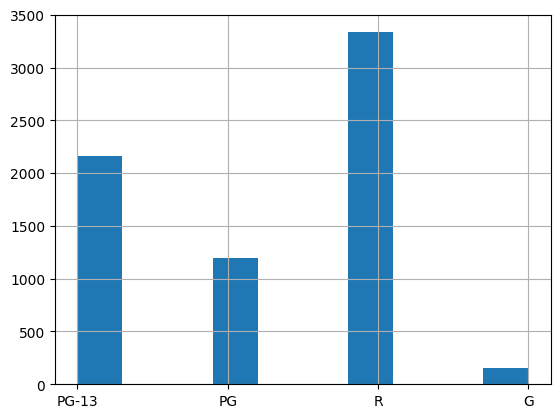

In [49]:
merged_df['mpaa'].hist()

#### Mean Values
Next I looked at things by the averages. The table below provides a summary of key statistics for each MPAA rating group.

Here's what each column represents:

- **mean_budget:** This is the average budget for movies within each MPAA rating group.
- **mean_gross:** This is the average gross revenue for movies within each MPAA rating group.
- **mean_profit:** This is the average amount of profit (gross minus budget)made for each MPAA rating group.
- **mean_roi:** This is the average Return on Investment for movies within each MPAA rating group.

In [50]:
means = by_rating[['movies','mean_budget','mean_gross', 'mean_profit', 'mean_roi']].round(2); means

,movies,mean_budget,mean_gross,mean_profit,mean_roi
mpaa,,,,,
G,154,42186363.64,1.493729e+08,1.071865e+08,4.21
PG,1196,40792363.60,1.304841e+08,8.969170e+07,3.23
PG-13,2162,49072848.19,1.413146e+08,9.224174e+07,2.34
R,3334,21089386.31,5.047330e+07,2.938391e+07,3.24


##### **Average Cost (Budget) By MPAA Rating**
This bar plot shows the average budget for movies across different MPAA ratings.

Here is what it shows:

- PG-13 movies have the highest mean budget (around 49 million dollars).
- G and PG movies have similar mean budgets, slightly lower than PG-13 movies (around 42 and 40 million dollars respectively).
- R movies have the lowest mean budget (around 21 million dollars).

Looking through the mean lens, **PG-13 movies are the most expensive to make on average, while R movies cost about half as much to make as PG, G, and PG-13 movies.**

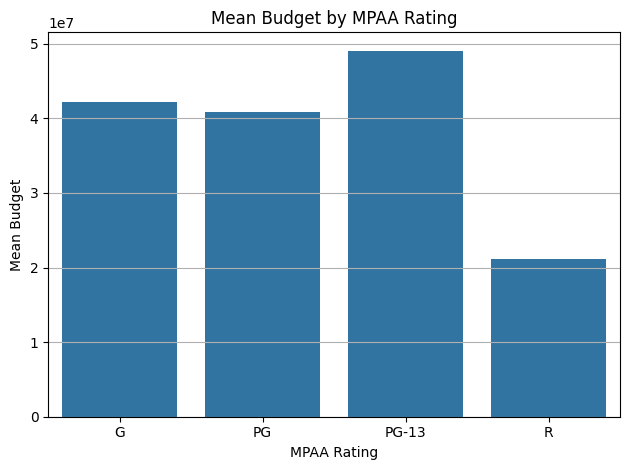

In [51]:
sns.barplot(x=by_rating.index, y='mean_budget', data=by_rating)
plt.title('Mean Budget by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Mean Budget')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### **Average Earnings (Gross) By MPAA Rating**
This bar plot visualizes the average gross revenue for movies across different MPAA ratings. Here we see:

- G-rated movies bring in the most money on average, with a mean gross of over 149 million dollars.
- PG-13 and PG movies have similar average gross revenues, both significantly lower than G-rated movies but substantially higher than R-rated movies.
- R movies have the lowest average gross revenue, around 50 million dollars.

This suggests that, on average, **G-rated movies tend to generate the highest gross revenue, while R-rated movies tend to generate the lowest. In fact G, PG, and PG-13 all generate nearly 3x as much revenue on average as R movies!**

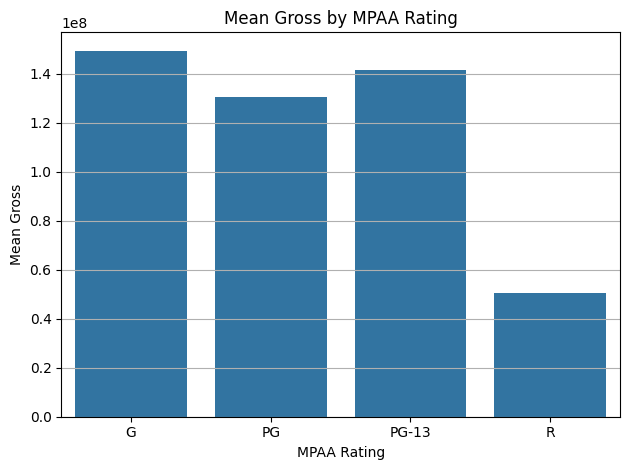

In [52]:
sns.barplot(x=by_rating.index, y='mean_gross', data=by_rating)
plt.title('Mean Gross by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Mean Gross')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### **Average Profit By MPAA Rating**
So which type is more profitable? It is difficult to compare profits accurately because publicly available budget numbers typically only include production costs, not marketing and promotion expenses. Profit numbers in this dataset are derived by subtracting budget from gross, which may not be accurate.

Looking at average profits for movies across different MPAA ratings, it looks like:

- Rated G movies are by far the most profitable on average, with a mean profit of over 100 million dollars.
PG-13 and PG movies have similar average profits, both significantly lower than G-rated movies but substantially higher than R-rated movies.
- R movies have the lowest average profit, around 29 million dollars.

So, on average, **G-rated movies tend to generate the highest profits, while R-rated movies tend to generate the lowest profits**.

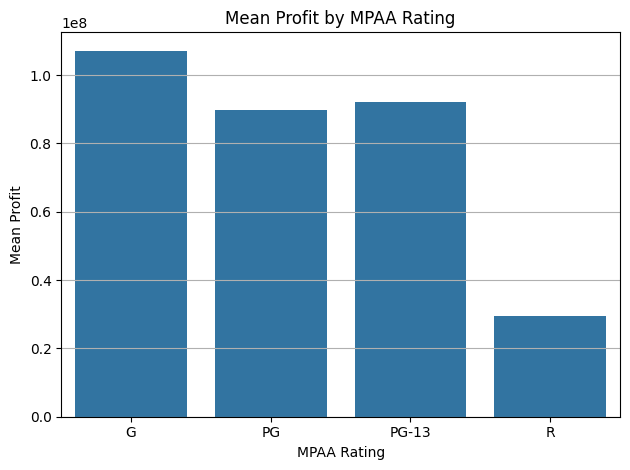

In [53]:
sns.barplot(x=by_rating.index, y='mean_profit', data=by_rating)
plt.title('Mean Profit by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Mean Profit')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### **Average ROI by MPAA Rating**
As expected, looking at average ROI:

- **G-rated movies have the highest mean ROI** (around 4.2). This suggests that, on average, for every dollar invested in a G-rated movie, there is a return of over four dollars in profit.
- PG-rated movies have a mean ROI of about 3.23.
- R-rated movies have a mean ROI very similar to PG movies, around 3.24.
- PG-13 rated movies have the lowest mean ROI (around 2.34).

Perhaps looking at the mean values alone might be misleading due to the presence of outliers (movies with very low budgets that made a lot of money, or movies with high budgets that lost alot of money,resulting in extremely high or low ROIs). So I decided to look closer at median values.

Note again: Like profits, our ROI number is derived using budget to represent cost, meaning our numbers may not be numerically accurate, but should be proportionally useful when comparing across rating types.

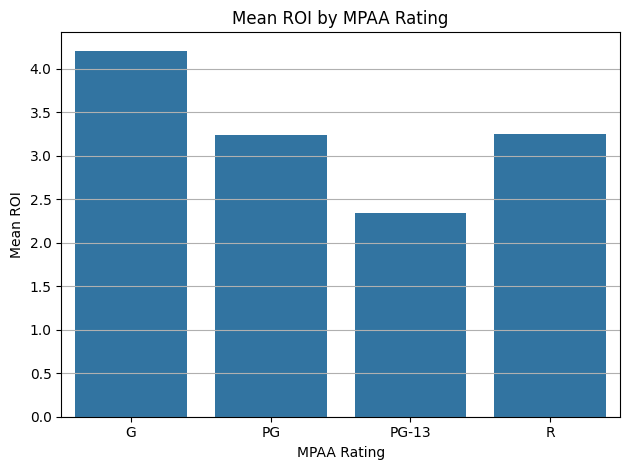

In [54]:
sns.barplot(x=by_rating.index, y='mean_roi', data=by_rating)
plt.title('Mean ROI by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Mean ROI')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#### Median Values
I noticed there are quite a few outliers in my dataset. To get a better measure of central tendency, next I looked at things by the **median values**. The table below provides a summary of key statistics for each MPAA rating group.

Here's what each column represents:

- **median_budget:** This is the median budget for movies within each MPAA rating group. The median is less affected by extremely high or low budgets compared to the mean.
- **median_gross:** This is the median gross revenue for movies within each MPAA rating group.
- **median_profit:** This is the median amount of profit (gross minus budget)made for each MPAA rating group.
- **median_roi:** This is the median Return on Investment for movies within each MPAA rating group. This provides a more typical measure of ROI for each rating, as it's not skewed by extreme outlier values.

In [55]:
medians = by_rating[['movies','median_budget','median_gross', 'median_profit', 'median_roi']]; medians

,movies,median_budget,median_gross,median_profit,median_roi
mpaa,,,,,
G,154,25000000.0,67741042.0,31383488.5,1.609342
PG,1196,24000000.0,42787910.0,18707655.0,0.953673
PG-13,2162,28000000.0,50588864.5,21060178.0,0.895557
R,3334,13000000.0,17732187.5,3864727.0,0.470312


##### **Median Cost (Budget) By MPAA Rating**
Which type of movie is the cheapest or most expensive to make? Looking through the median lens, **R movies cost about half as much to make as PG, G, and PG-13 movies.** PG-13 movies budgets are slightly more than G or PG movies.

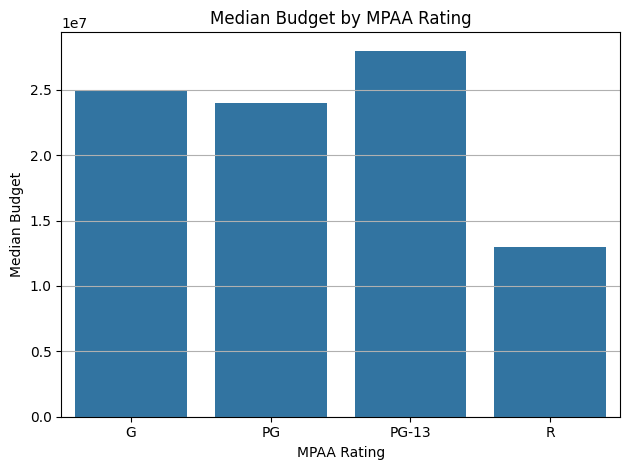

In [56]:
sns.barplot(x=by_rating.index, y='median_budget', data=by_rating)
plt.title('Median Budget by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Median Budget')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### **Median Earnings (Gross) By MPAA Rating**
Which type of movie generates the most income? Median rated G movies bring in by far the most money, followed by PG-13, and PG. R movies make the least money by a significant margin. **Median G movies make nearly 3.8 times more than R movies.**

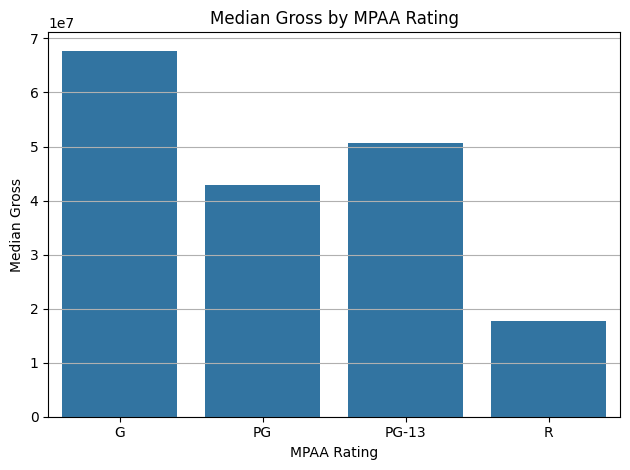

In [57]:
sns.barplot(x=by_rating.index, y='median_gross', data=by_rating)
plt.title('Median Gross by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Median Gross')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### **Median Profit By MPAA Rating**
Which type of movie is most profitable to produce? Rated G movies are by far the most profitable. **G movies are over 8 times more profitable than R movies, and over 1.5 times more profitable than PG or PG-13 movies.**

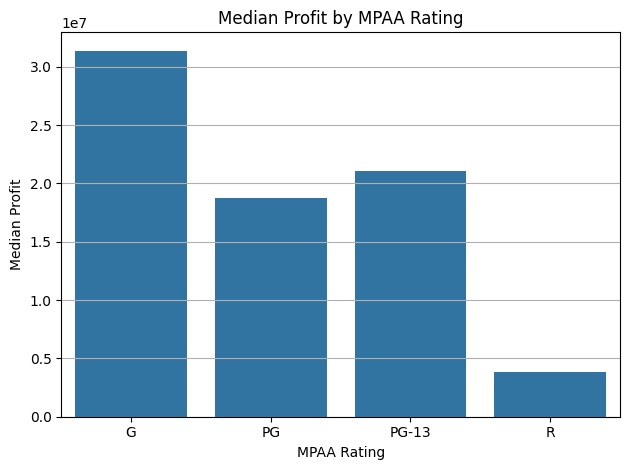

In [58]:
sns.barplot(x=by_rating.index, y='median_profit', data=by_rating)
plt.title('Median Profit by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Median Profit')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

##### **Median ROI by MPAA Rating**
When looking at the mean ROI, 'G' and 'R' ratings appear to have higher averages. However, the **median** ROI tells a different story, with 'G', 'PG', and 'PG-13' having higher median ROIs than 'R'. This difference between mean and median ROI, especially for 'R' rated movies, suggests that while the average ROI for R-rated films is boosted by a few highly profitable outliers (low budget, high gross), the typical R-rated film has a lower ROI compared to the typical G, PG, or PG-13 film.

More interestingly, it appears that **the more family friendly the movie is, the higher the ROI.**

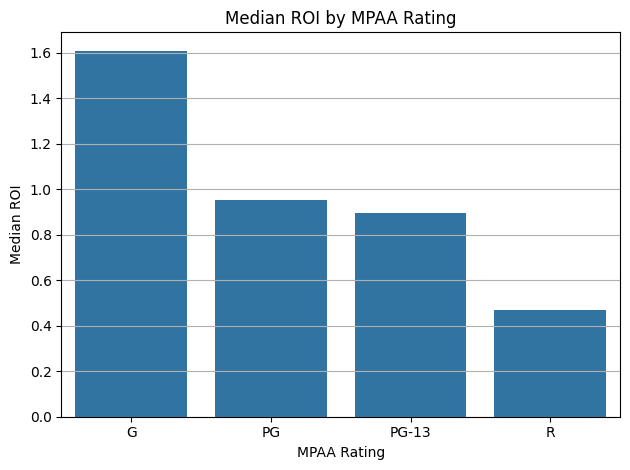

In [59]:
sns.barplot(x=by_rating.index, y='median_roi', data=by_rating)
plt.title('Median ROI by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Median ROI')
plt.grid(axis='y')
plt.tight_layout()
plt.show()

## Outliers
When dealing with movies, there are huge ranges in budgets and gross earnings, and there are alot of outliers.

I used a boxplot to look at the distribution of budgets by rating, and then individual scatterplots to look at outliers in each area to gauge if it is likely that my conclusions would substantially flip by omitting outliers.

I decided not to bother removing outliers, because it is interesting to look at the individual cases, and although they do skew the averages, the don't impact the medians.

#### Budget Outliers

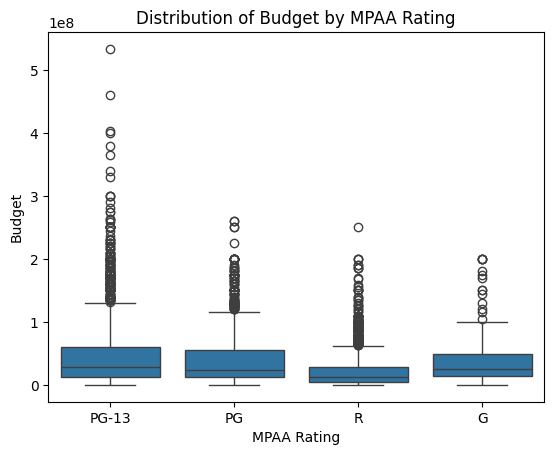

In [184]:
# Look at the distribution for budget by mpaa rating
sns.boxplot(x='mpaa', y='budget', data=merged_df)
plt.title('Distribution of Budget by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Budget')
plt.show()

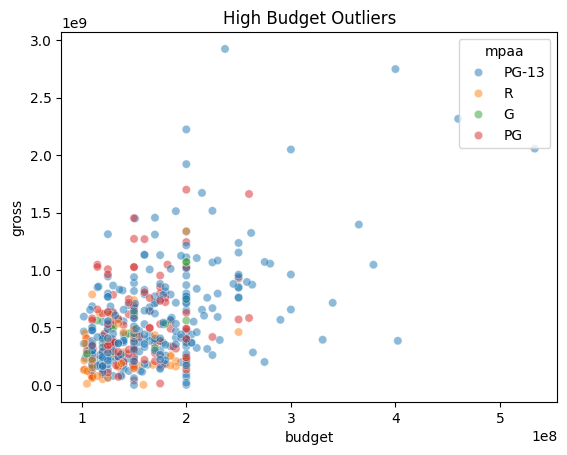

In [60]:
# Plot high budget outliers in the merged_df dataset
high_budget_outliers = merged_df[merged_df['budget'] > 100000000]
sns.scatterplot(data=high_budget_outliers, x='budget', y='gross', hue='mpaa', alpha=0.5)
plt.title('High Budget Outliers')
plt.show()

Here is a look at some of the most expensive to produce outliers in this dataset:

In [107]:
display(high_budget_outliers.sort_values('budget', ascending=False).head(10)[['title', 'mpaa', 'budget', 'gross', 'roi']])

,title,mpaa,budget,gross,roi
5868,Star Wars Ep. VII: The Force Awakens,PG-13,533200000.0,2056046835,2.856052
608,Avatar: The Way of Water,PG-13,460000000.0,2315589775,4.033891
3144,Indiana Jones and the Dial of Destiny,PG-13,402300000.0,383963057,-0.045580
610,Avengers: Endgame,PG-13,400000000.0,2748242781,5.870607
4861,Pirates of the Caribbean: On Stranger Tides,PG-13,379000000.0,1045713802,1.759139
609,Avengers: Age of Ultron,PG-13,365000000.0,1395316979,2.822786
2174,Fast X,PG-13,340000000.0,714375114,1.101103
5712,Solo: A Star Wars Story,PG-13,330400000.0,393151347,0.189925
611,Avengers: Infinity War,PG-13,300000000.0,2048359754,5.827866
3393,Justice League,PG-13,300000000.0,655945209,1.186484


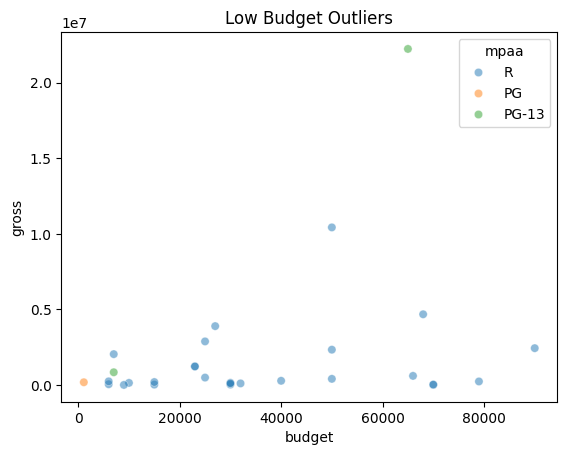

In [81]:
# Plot low budget outliers in the merged_df dataset
low_budget_outliers = merged_df[merged_df['budget'] < 100000]
sns.scatterplot(data=low_budget_outliers, x='budget', y='gross', hue='mpaa', alpha=0.5)
plt.title('Low Budget Outliers')
plt.show()

Here is a look at some of the lowest budget outliers: in this dataset:

In [105]:
display(low_budget_outliers.sort_values('budget', ascending=True).head(10)[['year','title', 'mpaa', 'budget', 'gross', 'roi']])

,year,title,mpaa,budget,gross,roi
4336,2005,My Date With Drew,PG,1100.0,181041,163.582727
2313,1998,Following,R,6000.0,48482,7.080333
2314,1999,Following,R,6000.0,240495,39.082500
1976,1992,El Mariachi,R,7000.0,2040920,290.560000
4968,2004,Primer,PG-13,7000.0,841926,119.275143
4442,2012,Newlyweds,R,9000.0,4584,-0.490667
1349,2006,Clean,R,10000.0,138711,12.871100
5496,2020,Sh*thouse,R,15000.0,24745,0.649667
7311,2006,The Puffy Chair,R,15000.0,195254,12.016933
5646,1990,Slacker,R,23000.0,1228108,52.396000


#### Gross Outliers

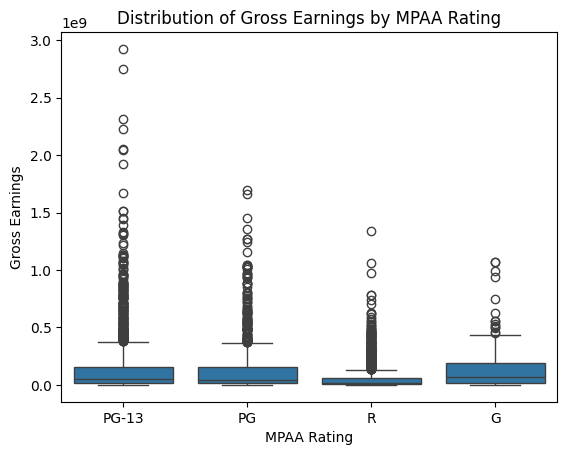

In [82]:
# Look at the distribution of gross earnings by mpaa rating
sns.boxplot(x='mpaa', y='gross', data=merged_df)
plt.title('Distribution of Gross Earnings by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Gross Earnings')
plt.show()

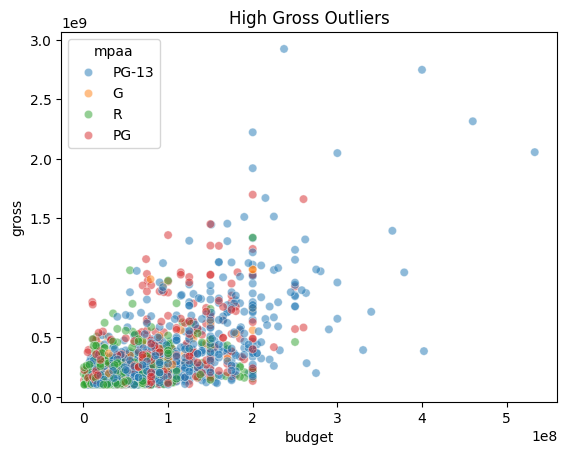

In [65]:
# Plot high gross outliers in the merged_df dataset
high_gross_outliers = merged_df[merged_df['gross'] > 100000000]
sns.scatterplot(data=high_gross_outliers, x='budget', y='gross', hue='mpaa', alpha=0.5)
plt.title('High Gross Outliers')
plt.show()

Here is a look at some of the highest grossing outliers in this dataset:

In [102]:
display(high_gross_outliers.sort_values('gross', ascending=False).head(10)[['title', 'mpaa', 'budget', 'gross', 'roi']])

,title,mpaa,budget,gross,roi
607,Avatar,PG-13,237000000.0,2923706026,11.336312
610,Avengers: Endgame,PG-13,400000000.0,2748242781,5.870607
608,Avatar: The Way of Water,PG-13,460000000.0,2315589775,4.033891
7775,Titanic,PG-13,200000000.0,2223048786,10.115244
5868,Star Wars Ep. VII: The Force Awakens,PG-13,533200000.0,2056046835,2.856052
611,Avengers: Infinity War,PG-13,300000000.0,2048359754,5.827866
5803,Spider-Man: No Way Home,PG-13,200000000.0,1921206586,8.606033
3165,Inside Out 2,PG,200000000.0,1698863816,7.494319
3375,Jurassic World,PG-13,215000000.0,1671063641,6.772389
6997,The Lion King,PG,260000000.0,1661454403,5.390209


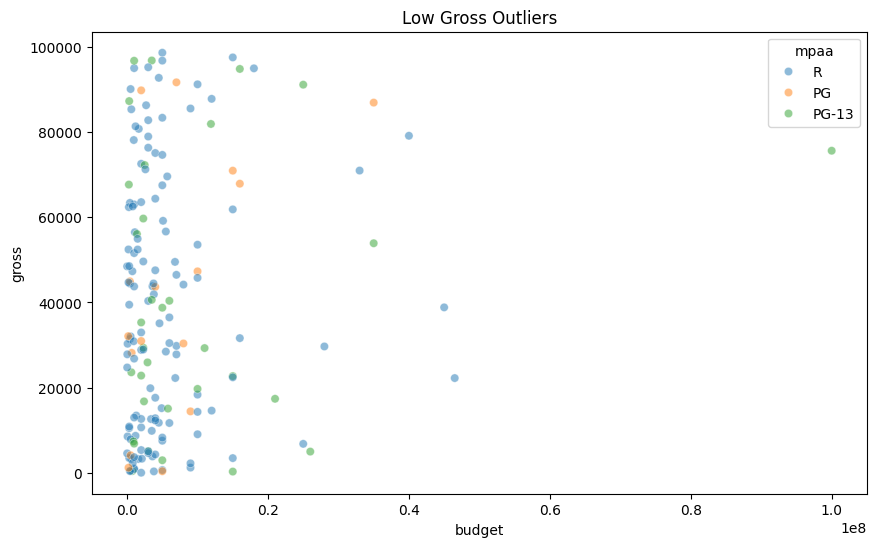

In [67]:
# Plot low gross outliers in the merged_df dataset
low_gross_outliers = merged_df[merged_df['gross'] < 100000]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=low_gross_outliers, x='budget', y='gross', hue='mpaa', alpha=0.5)
plt.title('Low Gross Outliers')
plt.show()

Here is a look at some of the lowest grossing outliers in this dataset:

In [110]:
display(low_gross_outliers.sort_values('gross', ascending=True).head(10)[['title', 'mpaa', 'budget', 'gross', 'roi']])

,title,mpaa,budget,gross,roi
7598,The Walking Deceased,R,2000000.0,43,-0.999978
7880,Trojan War,PG-13,15000000.0,309,-0.999979
7513,The Taking of Pelham One Two Three,R,3800000.0,353,-0.999907
1172,Capricorn One,PG,5000000.0,401,-0.999920
6488,The Dark Hours,R,400000.0,423,-0.998942
1720,Destiny,PG-13,750000.0,450,-0.999400
2872,Higher Power,R,500000.0,528,-0.998944
1001,Born of War,R,5000000.0,671,-0.999866
3113,In Her Line of Fire,R,1000000.0,884,-0.999116
1285,Childless,R,1000000.0,1036,-0.998964


#### Profit Outliers

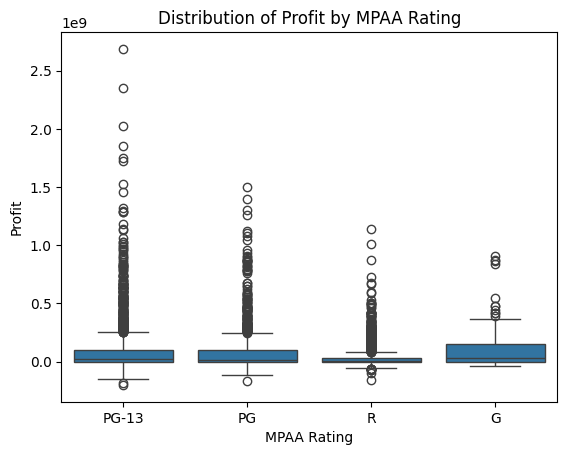

In [85]:
# Look at the distribution of profit by mpaa rating
sns.boxplot(x='mpaa', y='profit', data=merged_df)
plt.title('Distribution of Profit by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('Profit')
plt.show()

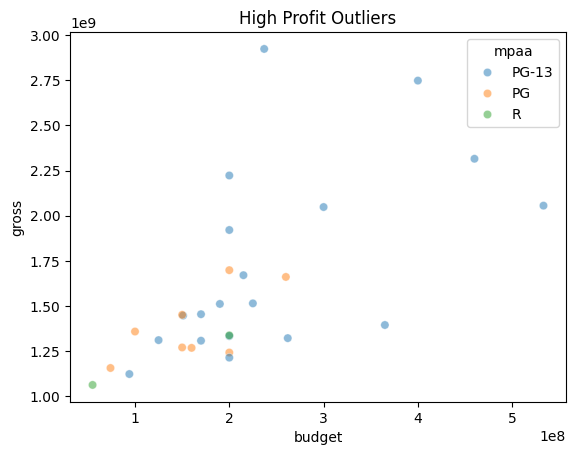

In [69]:
# Plot high profit outliers in the merged_df dataset
high_profit_outliers = merged_df[merged_df['profit'] > 1000000000]
sns.scatterplot(data=high_profit_outliers, x='budget', y='gross', hue='mpaa', alpha=0.5)
plt.title('High Profit Outliers')
plt.show()

Here is a look at some of the most profitable outliers in this dataset:

In [113]:
display(high_profit_outliers.sort_values('profit', ascending=False).head(10)[['title', 'mpaa', 'budget', 'gross', 'profit']])

,title,mpaa,budget,gross,profit
607,Avatar,PG-13,237000000.0,2923706026,2.686706e+09
610,Avengers: Endgame,PG-13,400000000.0,2748242781,2.348243e+09
7775,Titanic,PG-13,200000000.0,2223048786,2.023049e+09
608,Avatar: The Way of Water,PG-13,460000000.0,2315589775,1.855590e+09
611,Avengers: Infinity War,PG-13,300000000.0,2048359754,1.748360e+09
5803,Spider-Man: No Way Home,PG-13,200000000.0,1921206586,1.721207e+09
5868,Star Wars Ep. VII: The Force Awakens,PG-13,533200000.0,2056046835,1.522847e+09
3165,Inside Out 2,PG,200000000.0,1698863816,1.498864e+09
3375,Jurassic World,PG-13,215000000.0,1671063641,1.456064e+09
6997,The Lion King,PG,260000000.0,1661454403,1.401454e+09


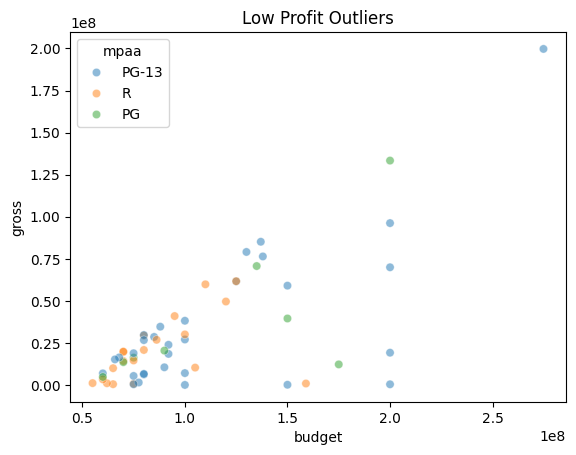

In [71]:
# Plot low profit outliers in the merged_df dataset
low_profit_outliers = merged_df[merged_df['profit'] < -50000000]
sns.scatterplot(data=low_profit_outliers, x='budget', y='gross', hue='mpaa', alpha=0.5)
plt.title('Low Profit Outliers')
plt.show()

Here is a look at some of the biggest money losing outliers in this dataset:

In [114]:
display(low_profit_outliers.sort_values('profit', ascending=True).head(10)[['title', 'mpaa', 'budget', 'gross', 'profit']])

,title,mpaa,budget,gross,profit
6721,The Gray Man,PG-13,200000000.0,451178,-199548822.0
7544,The Tomorrow War,PG-13,200000000.0,19220000,-180780000.0
7927,Turning Red,PG,175000000.0,12271142,-162728858.0
6872,The Irishman,R,159000000.0,914706,-158085294.0
5130,Red Notice,PG-13,150000000.0,173638,-149826362.0
4290,Mulan,PG-13,200000000.0,69973540,-130026460.0
3976,Mars Needs Moms,PG,150000000.0,39549758,-110450242.0
545,Argylle,PG-13,200000000.0,96214128,-103785872.0
7107,The Midnight Sky,PG-13,100000000.0,75615,-99924385.0
7826,Town & Country,R,105000000.0,10364769,-94635231.0


#### ROI Outliers

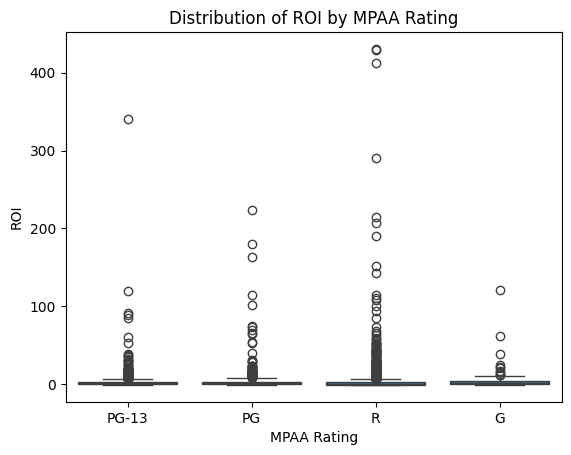

In [87]:
# Look at the distribution of ROI by mpaa rating
sns.boxplot(x='mpaa', y='roi', data=merged_df)
plt.title('Distribution of ROI by MPAA Rating')
plt.xlabel('MPAA Rating')
plt.ylabel('ROI')
plt.show()

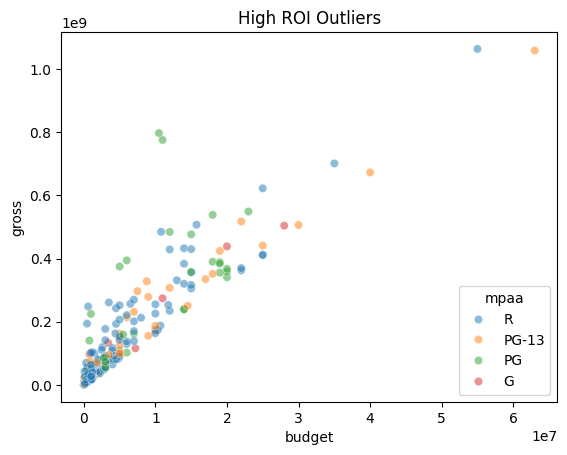

In [73]:
# Plot high roi outliers in the merged_df dataset
high_roi_outliers = merged_df[merged_df['roi'] > 15]
sns.scatterplot(data=high_roi_outliers, x='budget', y='gross', hue='mpaa', alpha=0.5)
plt.title('High ROI Outliers')
plt.show()

Here are some of the highest ROI outliers in this dataset:

In [99]:
display(high_roi_outliers.sort_values('roi', ascending=False).head(10)[['title', 'mpaa', 'budget', 'gross', 'roi']])

,title,mpaa,budget,gross,roi
4748,Paranormal Activity,R,450000.0,194183034,430.517853
6656,The Gallows,R,100000.0,42964410,428.644100
6314,The Blair Witch Project,R,600000.0,248300000,412.833333
6003,Super Size Me,PG-13,65000.0,22233808,341.058585
1976,El Mariachi,R,7000.0,2040920,290.560000
5271,Rocky,PG,1000000.0,225000000,224.000000
2685,Halloween,R,325000.0,70274000,215.227692
6372,The Brothers McMullen,R,50000.0,10426506,207.530120
7524,The Texas Chainsaw Massacre,R,140000.0,26704148,189.743914
405,American Graffiti,PG,777000.0,140557835,179.898115


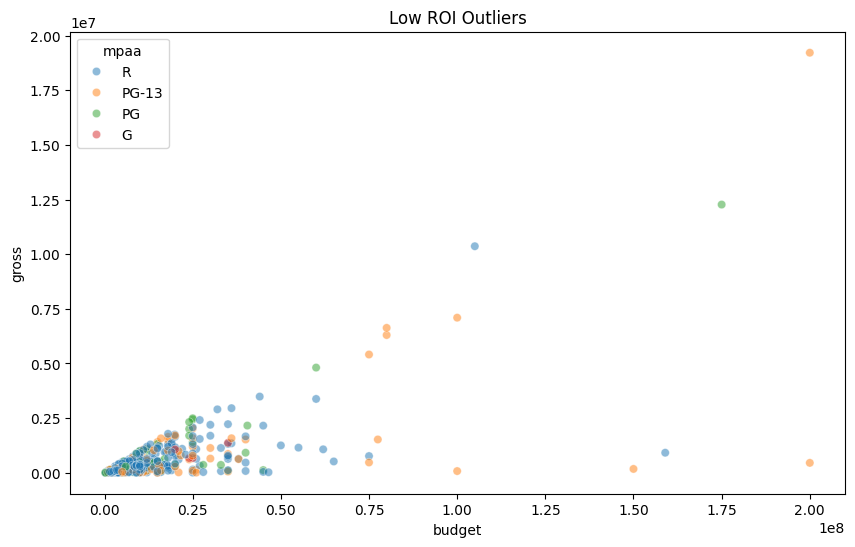

In [75]:
# Plot low roi outliers in the merged_df dataset
low_roi_outliers = merged_df[merged_df['roi'] < -.9]
plt.figure(figsize=(10, 6))
sns.scatterplot(data=low_roi_outliers, x='budget', y='gross', hue='mpaa', alpha=0.5)
plt.title('Low ROI Outliers')
plt.show()

Here are the lowest ROI outliers in this dataset:

In [97]:
display(low_roi_outliers.sort_values('roi', ascending=True).head(10)[['title', 'mpaa', 'budget', 'gross', 'roi']])

,title,mpaa,budget,gross,roi
7880,Trojan War,PG-13,15000000.0,309,-0.999979
7598,The Walking Deceased,R,2000000.0,43,-0.999978
1172,Capricorn One,PG,5000000.0,401,-0.999920
7513,The Taking of Pelham One Two Three,R,3800000.0,353,-0.999907
1001,Born of War,R,5000000.0,671,-0.999866
5638,Skin Trade,R,9000000.0,1242,-0.999862
6740,The Grimm Brothers' Snow White,PG-13,26000000.0,5000,-0.999808
1079,Broken Horses,R,15000000.0,3471,-0.999769
8086,Veronika Decides to Die,R,9000000.0,2243,-0.999751
4315,Mutant Chronicles,R,25000000.0,6820,-0.999727


## Correlations ##

The correlation between **budget and gross** is the strongest among the relationships between the financial metrics. The correlations between year/decade and budget/gross are also notable and point to trends over time.

#### Correlation Matrix

In [121]:
# Calculate and display the correlation matrix for numeric columns
correlation_matrix = merged_df.select_dtypes(include=np.number).corr()
display(correlation_matrix)

,year,budget,gross,mpaa_num,decade,roi,profit
year,1.000000,0.295347,0.211127,0.036804,0.969078,-0.044688,0.168309
budget,0.295347,1.000000,0.734672,-0.217831,0.289819,-0.064205,0.593392
gross,0.211127,0.734672,1.000000,-0.199278,0.202375,0.096367,0.982020
mpaa_num,0.036804,-0.217831,-0.199278,1.000000,0.035619,0.002575,-0.175819
decade,0.969078,0.289819,0.202375,0.035619,1.000000,-0.046497,0.159462
roi,-0.044688,-0.064205,0.096367,0.002575,-0.046497,1.000000,0.132201
profit,0.168309,0.593392,0.982020,-0.175819,0.159462,0.132201,1.000000


#### Heatmap of correlation matrix

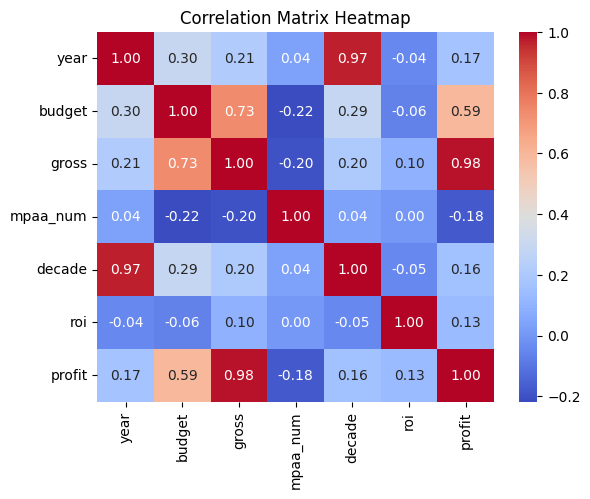

In [133]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()

Based on the heatmap, you can see:

- **Strong positive correlations between** **budget and gross**, and gross and profit. This is expected, as higher budgets often lead to higher gross revenues, and profit is calculated from gross and budget.
- **Moderate positive correlations between** **year/decade and budget/gross**, suggesting that movie budgets and gross revenues have generally increased over time.
- **Weak negative correlations between mpaa_num and budget/gross/profit**. This indicates a slight tendency for movies with higher numerical MPAA ratings (which correspond to more restrictive ratings like R) to have lower budgets, gross revenues, and profits.
- Relatively weak correlations involving roi, which is often the case as ROI can be highly sensitive to both budget and gross, leading to a wider spread of values.

#### Scatter plot of Budget vs Gross
To better see this correlation, I made a scatterplot that visualizes the relationship between the budget of a movie and its gross revenue, showing the strong correlation between the budget of a movie and how much it makes.

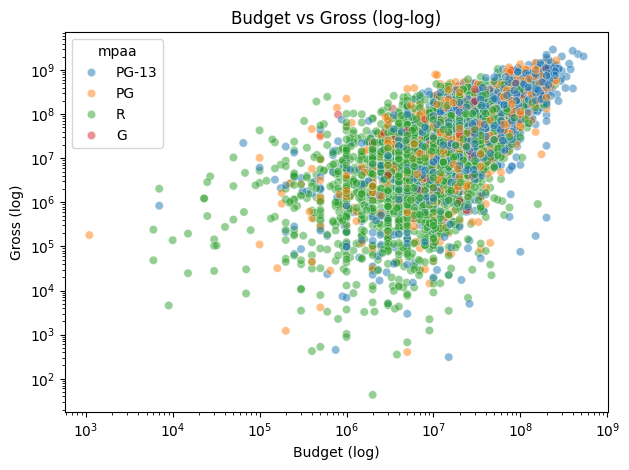

In [141]:
# Scatterplot of Budget vs Gross
ax = sns.scatterplot(data=merged_df, x='budget', y='gross', hue='mpaa', alpha=0.5)
ax.set(xscale='log', yscale='log'); plt.title('Budget vs Gross (log-log)')
plt.xlabel('Budget (log)'); plt.ylabel('Gross (log)')
plt.tight_layout(); plt.show()

#### Mean Budget vs Mean Gross By MPAA Rating

This scatter plot visually makes it easiest to visualize the relationships between budget, gross and MPAA rating:
- G movies are the highest grossing, but very expensive to make
- PG movies are not the most expensive to make, but also not as high grossing.- - PG-13 movies are more expensive to make but slightly higher grossing than PG movies.
- R-rated movies are by far the least expensive to make and also by far the lowest grossing.



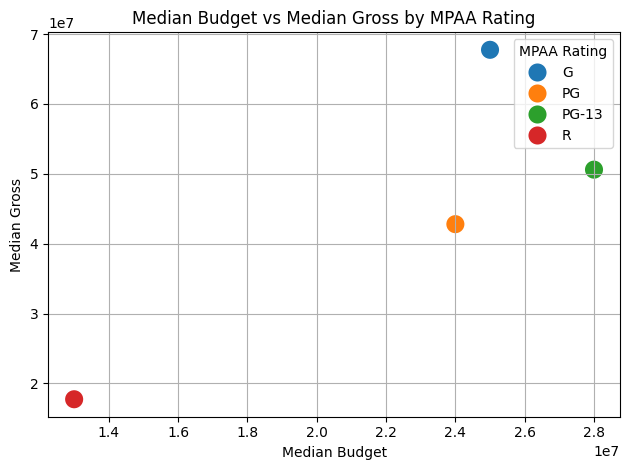

In [132]:
sns.scatterplot(data=by_rating, x='median_budget', y='median_gross', hue=by_rating.index, s=200) # Use index for MPAA rating as it's the index
plt.title('Median Budget vs Median Gross by MPAA Rating')
plt.xlabel('Median Budget')
plt.ylabel('Median Gross')
plt.legend(title='MPAA Rating')
plt.grid(True)
plt.tight_layout()
plt.show()

## Trends over Time
One of my initial question in this study was whether any observed trends were changing over time. With over 40 years of data to look at, we should be able to see major changes when aggregating by decade.

#### Count by Rating per Decade
I created a line plot to visualize the number of movies per decade of each MPAA Rating. This reveals some interesting trends in movie production over time:

- **Dominance of R-rated movies:** The plot clearly shows that R-rated movies have consistently had the highest number of releases across most decades, especially from the 1980s onwards.
- **Growth of PG-13:** PG-13 was created in the 1980s to fill the gap between PG and R, and it has grown steadily to surpass PG releases.
- **Decline of G movies**: The number of PG and G releases shows more fluctuation across the decades compared to R and PG-13. Interestingly, G-rated movies consistently have the lowest number of releases and have decreased slightly in recent decades, in spite of their success.

In [188]:
# Pivot the decade_counts DataFrame to get a table format
decade_counts_pivot = decade_counts.pivot(index='decade', columns='mpaa', values='count').fillna(0).astype(int)

# Display the pivot table
display(decade_counts_pivot)

mpaa,G,PG,PG-13,R
decade,,,,
1960,2,2,2,3
1970,14,40,0,32
1980,15,289,138,486
1990,48,222,388,857
2000,53,284,767,907
2010,21,296,731,921
2020,1,63,136,128


In [169]:
# RELEASES BY RATING (BY DECADE)
# Calculate counts by decade and mpaa_rating
decade_counts = (merged_df
    .groupby(['decade', 'mpaa'])
    ['title'].count()
    .reset_index(name='count')
)

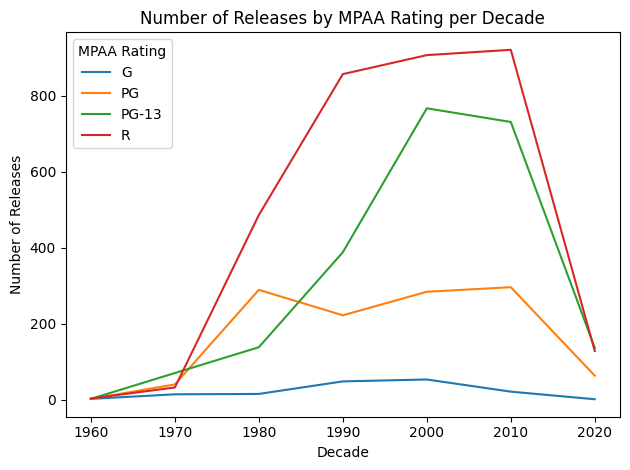

In [170]:
# Define barplot
sns.lineplot(
    data=decade_counts,
    x='decade',
    y='count',
    hue='mpaa')
plt.title('Number of Releases by MPAA Rating per Decade')
plt.xlabel('Decade')
plt.ylabel('Number of Releases')
plt.legend(title='MPAA Rating')
plt.tight_layout()
plt.show()

#### Budget by Rating per Decade
Looking at the difference in production costs over time we see some interesting differences when looking at the mean vs the median plots:

Flattened median Budget for G Movies from the 1990s on:
- There is a flattening, even a decline, of budget in G movies from the 1990s forward, which doesn't seem to align with the average budget, count, or profit charts. Why is this?
- The flattening median could suggest that the majority of G-rated films produced since the 1990s, while still profitable on average, might not have had the same consistently increasing budgets as the most expensive G-rated films. This could include a steady stream of lower-to-mid budget G-rated films (e.g., certain documentaries, independent family films, or direct-to-video releases not fully captured in the data).
- In some cases, advancements in technology might allow for high-quality G-rated films to be produced at relatively lower costs compared to earlier decades, potentially contributing to a stable or slightly declining median budget even as production values remain high.

NOTE: There is only a single G movie in our dataset for the 2020s, so the sample size is too small to infer anything from.

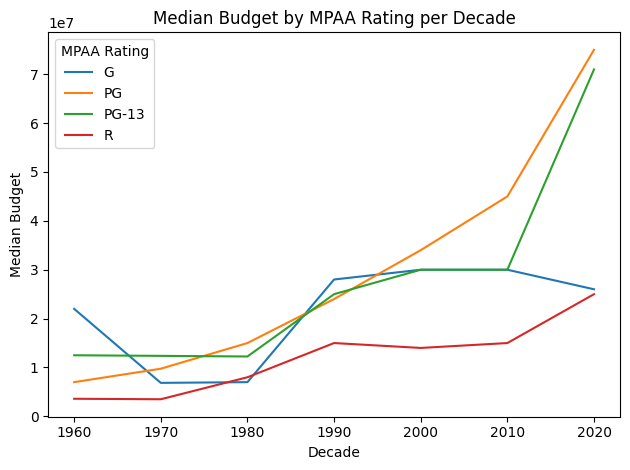

In [168]:
# MEDIAN BUDGET BY RATING (BY DECADE)
# Calculate counts by decade and mpaa_rating
median_budget_by_rating_decade = (merged_df
    .groupby(['decade', 'mpaa'])
    ['budget'].median()
    .reset_index()
)
# Define barplot
sns.lineplot(
    data=median_budget_by_rating_decade,
    x='decade',
    y='budget',
    hue='mpaa')
plt.title('Median Budget by MPAA Rating per Decade')
plt.xlabel('Decade')
plt.ylabel('Median Budget')
plt.legend(title='MPAA Rating')
plt.tight_layout()
plt.show()

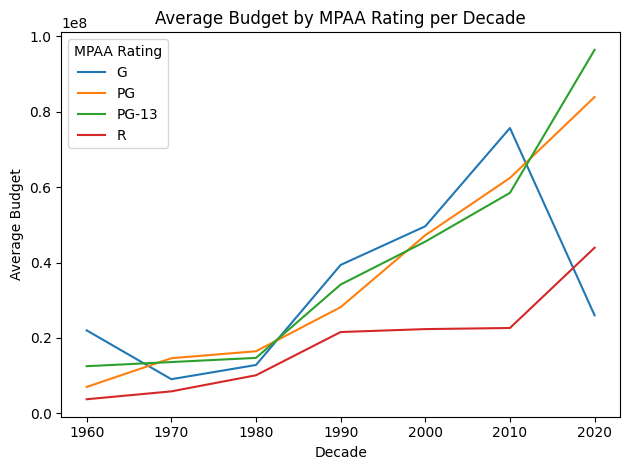

In [167]:
# AVE BUDGET BY RATING (BY DECADE)
# Calculate counts by decade and mpaa_rating
avg_budget_by_rating_decade = (merged_df
    .groupby(['decade', 'mpaa'])
    ['budget'].mean()
    .reset_index()
)
# Define barplot
sns.lineplot(
    data=avg_budget_by_rating_decade,
    x='decade',
    y='budget',
    hue='mpaa')
plt.title('Average Budget by MPAA Rating per Decade')
plt.xlabel('Decade')
plt.ylabel('Average Budget')
plt.legend(title='MPAA Rating')
plt.tight_layout()
plt.show()

#### Gross Revenue by Rating (by Decade)

Looking at how typical gross revenue for movies of different ratings has changed over time, there are some interesting insights:

- **Movies are Big Business:** Generally, the median gross revenue for all MPAA ratings appears to have an upward trend across the decades, indicating that movies, in general, are earning more over time (though this is not adjusted for inflation). G, PG, and PG-13 rated movies tend to have higher typical earnings per film compared to R-rated movies, and this trend appears to persist across most decades in the dataset.
- **Dip in G Movies Revenue in the 2010s:** The dip in G movie revenue in the 2010s is also notable. This could be due to fewer G-rated releases. With fewer G movies being made, the sample size for calculating the median revenue is smaller and could be more influenced by the performance of a few films.
- **Shift to PG?:** Some films that might have been rated G in earlier decades could now be receiving a PG rating due to changing content standards or a desire to reach a slightly older family audience. The increasing median revenue for PG movies in later decades could be driven by the success of major animated films and family-friendly blockbusters. Many highly profitable franchises and standalone movies aimed at a broader audience fall under the PG rating. As production values and marketing for these films have increased over time, so has their earning potential.
- **Rise of the Sequel?**: It's possible that the G-rated films released in the 2010s, as a group, did not perform as well financially as those in surrounding decades, even without being low-budget films.
- **R-rated Movies increase in Popularity:** Consistently across all decades, R-rated movies have the lowest median gross revenue compared to the other ratings, but their median gross has increased over time.

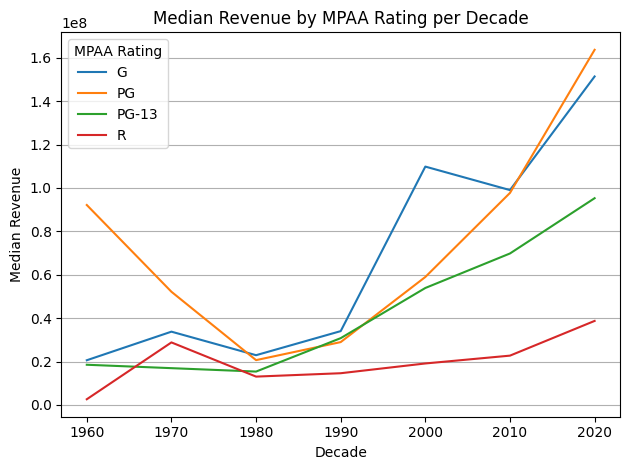

In [154]:
# MEDIAN GROSS BY RATING (BY DECADE)
# Calculate median gross by rating per decade
median_gross_by_rating_decade = (merged_df
    .groupby(['decade', 'mpaa'])
    ['gross'].median()
    .reset_index()
)
# Define barplot
sns.lineplot(
    data=median_gross_by_rating_decade,
    x='decade',
    y='gross',
    hue='mpaa')
plt.title('Median Revenue by MPAA Rating per Decade')
plt.xlabel('Decade')
plt.ylabel('Median Revenue')
plt.legend(title='MPAA Rating')
plt.grid(axis='y') # Add grid lines on the y-axis for better readability of bar heights
plt.tight_layout()
plt.show()

#### Profit by Rating (by Decade)

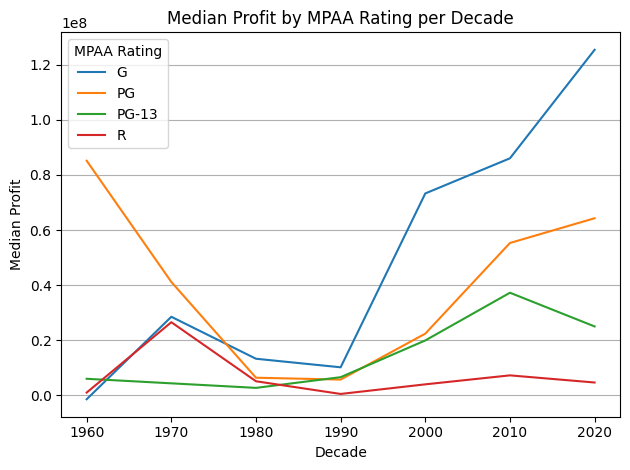

In [176]:
# MEDIAN PROFIT BY RATING (BY DECADE)
# Calculate median profit by rating per decade
median_profit_by_rating_decade = (merged_df
    .groupby(['decade', 'mpaa'])
    ['profit'].median()
    .reset_index()
)
# Define barplot
sns.lineplot(
    data=median_profit_by_rating_decade,
    x='decade',
    y='profit',
    hue='mpaa')
plt.title('Median Profit by MPAA Rating per Decade')
plt.xlabel('Decade')
plt.ylabel('Median Profit')
plt.legend(title='MPAA Rating')
plt.grid(axis='y') # Add grid lines on the y-axis for better readability of bar heights
plt.tight_layout()
plt.show()

## Summary of Findings

Based on this analysis, here is a summary of the findings, and the answers I found to my initial questions.

**Which ratings are produced most often?**

*   The analysis of movie counts by MPAA rating clearly shows that **R-rated movies are produced most often** in this dataset, followed by PG-13, PG, and then G. This trend is consistent across most decades from the 1980s onwards, with R and PG-13 dominating the number of releases.

**Which MPAA ratings tend to earn more revenue?**

*   When looking at average gross revenue, **G-rated movies tend to earn the most**, followed by PG-13 and PG, with **R-rated movies earning the least** on average. The median gross revenue provides a more typical picture, where G-rated movies still lead, followed by PG-13 and PG, with R-rated movies earning significantly less. This suggests that while there are fewer G-rated movies, the typical G movie earns more than a typical movie of other ratings, and the average for G is heavily influenced by a few very high-grossing films.

**Which cost more to make?**

*   Analyzing both average and median budgets, **PG-13 movies tend to have the highest budgets**, followed closely by G and PG. **R-rated movies consistently have the lowest average and median budgets**, costing significantly less to make than movies in the other rating categories.

**Which deliver higher profitability?**

*   Similar to gross revenue, **average profit is highest for G-rated movies**, followed by PG-13 and PG, and lowest for R-rated movies. Median profit shows a more extreme difference, with **G, PG, and PG-13 movies having considerably higher median profits than R-rated movies**. This distinction highlights the impact of high-profit outliers (likely blockbusters) in the G, PG, and PG-13 categories that skew the average upwards. The median suggests that a typical G, PG, or PG-13 movie is more profitable than a typical R-rated movie.

**Do “family-friendly” films (G/PG, or even PG-13) outperform R-rated films?**

*   Based on the analysis of median gross revenue, median profit, and median ROI, **"family-friendly" films (G, PG, and PG-13) generally outperform R-rated films** in terms of typical earnings, profitability, and return on investment. While R-rated films are produced more often and have lower production costs, the data suggests that the typical G, PG, and PG-13 film generates higher revenue and profit, and provides a better return on the investment. The presence of high-ROI outliers in the R category (often low-budget horror films that are very profitable relative to their cost) can inflate the average ROI, but the median ROI provides a clearer picture of the typical return, where family-friendly films tend to fare better.

**How are these trends changing over time?**

*   **Movie Production:** The number of R and PG-13 rated movies has increased significantly over the decades, dominating releases from the 1980s onwards. The number of G and PG releases has been lower and more variable.
*   **Budgets:** Average and median movie budgets have generally increased over time across all ratings, likely due to inflation and increasing production scale. R-rated movies have consistently maintained the lowest average and median budgets per decade.
*   **Revenue and Profit:** Average and median gross revenue and profit have also generally increased over time for all ratings. G, PG, and PG-13 movies have consistently shown higher typical (median) revenue and profit compared to R-rated movies throughout the decades. The average revenue and profit, particularly for G, PG, and PG-13, are heavily influenced by high-grossing and high-profit outlier films in certain decades.

## Conclusion

While this analysis clearly shows that, on average and typically (median), family-friendly films tend to be more profitable, then why are there so many more R-rated movies made than family friendly offerings?

Here are some possible reasons why studios continue to produce a high number of R-rated movies:

- **Lower Cost:** As this data shows, R-rated movies generally have lower budgets. That means it is easier for smaller studios to raise money.
- **Lower Risk:** Because the budget is lower, the potential financial loss on an R-rated film is often lower than on a big-budget G, PG, or PG-13 blockbuster. While the ceiling for profit might be lower on average, the floor for loss can also be lower.
- **High ROI Potential (Outliers):** Although the median ROI for R films is lower, our outlier analysis shows that some of the highest ROI films are R-rated (often low-budget horror or thrillers that make a significant profit relative to their minimal cost). These occasional massive successes can incentivize studios to keep making R-rated films, hoping to strike gold.
- **Targeted Audience and Genre Demand:** R-rated films cater to specific adult audiences and popular genres like horror, adult comedy, and thrillers. There is consistent demand for these types of movies, and studios want to capture that market.
- **Creative Freedom and Prestige:** The R rating can allow for more mature themes, complex storytelling, and creative freedom that might not be possible within the constraints of a more family-friendly rating. Some R-rated films are critically acclaimed and can bring prestige to a studio, even if they aren't massive box office hits.
- **Faster and Easier to Make:** R-rated films fall into genres like horror, independent drama, or low-budget action, which typically have simpler settings and visuals compared to large-scale fantasy, superhero, or animated films often found in PG and PG-13 categories that rely on expensive CGI or elaborate sets.
- **Talent Attraction:** Directors, writers, and actors may be drawn to R-rated projects that offer more challenging or unconventional material.
- **Filling Release Schedules:** Studios need to release a certain number of films each year to stay competitive and utilize their resources. R-rated films are a consistent source of content to fill those slots.